# 2.2 Dimensionality Reduction - PCA (Principal Component Analysis)

In [80]:
print(np.isinf(df_scaled).sum())

age          0
sex          0
trestbps     0
chol         0
fbs          0
thalach      0
exang        0
oldpeak      0
ca           0
num          0
cp_2         0
cp_3         0
cp_4         0
restecg_1    0
restecg_2    0
slope_2      0
slope_3      0
thal_6.0     0
thal_7.0     0
dtype: int64


In [81]:
# Check datatypes
print(df_scaled.dtypes)

# Convert all columns to numeric just in case
df_scaled = df_scaled.apply(pd.to_numeric, errors='coerce')

# Recheck NaN values (some strings may have turned into NaN)
print(df_scaled.isna().sum())

# Drop any new NaN values created by conversion
df_scaled = df_scaled.dropna()


age          float64
sex          float64
trestbps     float64
chol         float64
fbs          float64
thalach      float64
exang        float64
oldpeak      float64
ca           float64
num          float64
cp_2            bool
cp_3            bool
cp_4            bool
restecg_1       bool
restecg_2       bool
slope_2         bool
slope_3         bool
thal_6.0        bool
thal_7.0        bool
dtype: object
age          0
sex          0
trestbps     0
chol         0
fbs          0
thalach      0
exang        0
oldpeak      0
ca           4
num          0
cp_2         0
cp_3         0
cp_4         0
restecg_1    0
restecg_2    0
slope_2      0
slope_3      0
thal_6.0     0
thal_7.0     0
dtype: int64


In [82]:
df_scaled = df_scaled.dropna(subset=['ca'])
print("✅ Dropped rows with missing `ca`.")
print("Remaining shape:", df_scaled.shape)

✅ Dropped rows with missing `ca`.
Remaining shape: (299, 19)


**Step 1: Import PCA and apply it**

In [83]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Separate features and target
X = df_scaled.drop(columns=['num'])  # 'num' is the target
y = df_scaled['num']

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

**Step 2 — Cumulative Explained Variance**

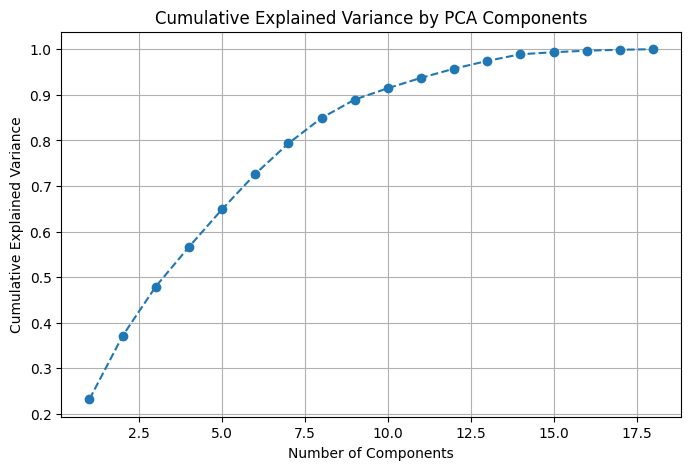

✅ Number of components explaining 95% variance: 12


In [84]:
# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Show how many components explain 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"✅ Number of components explaining 95% variance: {n_components_95}")

**Step 3 — 2D PCA Scatter Plot (for visualization)**

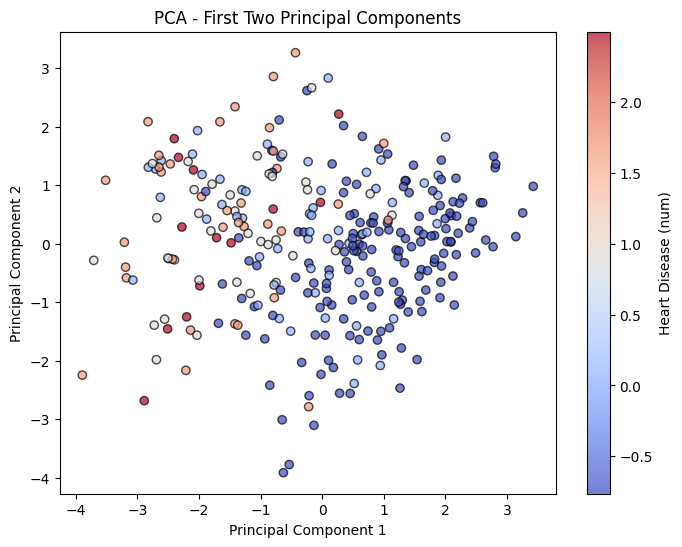

In [85]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.title('PCA - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Heart Disease (num)')
plt.show()
